In [64]:
%pip install -q yfinance

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-17,114.889999,115.830002,114.220001,115.500000,115.500000,65655200,AMAZON
2023-05-18,116.690002,118.599998,116.339996,118.150002,118.150002,73174100,AMAZON
2023-05-19,118.160004,118.309998,115.699997,116.250000,116.250000,54990200,AMAZON
2023-05-22,116.769997,116.769997,114.250000,115.010002,115.010002,70741100,AMAZON
2023-05-23,114.269997,117.139999,113.779999,114.989998,114.989998,67576300,AMAZON
2023-05-24,115.349998,117.339996,115.019997,116.750000,116.750000,63487900,AMAZON
2023-05-25,116.629997,116.870003,114.309998,115.000000,115.000000,66496700,AMAZON
2023-05-26,116.040001,121.500000,116.019997,120.110001,120.110001,96681000,AMAZON
2023-05-30,122.370003,122.919998,119.860001,121.660004,121.660004,64314800,AMAZON


In [66]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,103.791947,105.363286,102.575900,103.999421,103.999421,2.790619e+07
std,9.931838,10.088793,9.936922,10.071048,10.071048,1.082022e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.161410e+07
50%,102.879997,104.220001,101.860001,103.629997,103.629997,2.530280e+07
75%,111.484997,113.346752,109.567749,111.825001,111.825001,3.139695e+07
max,126.290001,127.050003,123.449997,125.870003,125.870003,9.779860e+07


In [67]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-01 to 2023-05-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-06-01 to 2023-05-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


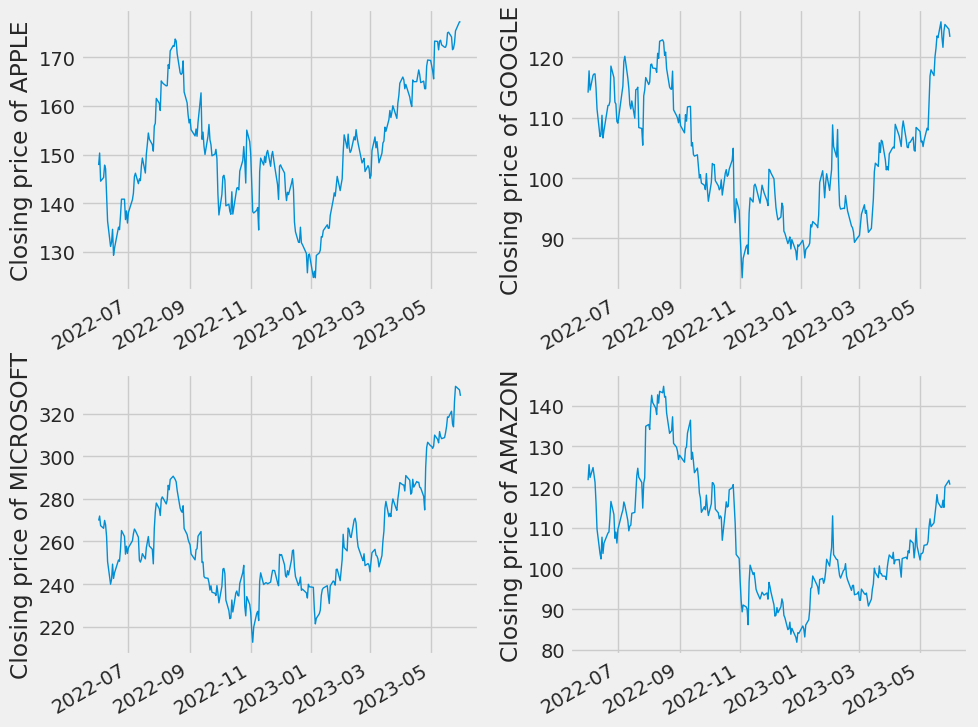

In [69]:
plt.figure(figsize=(10,7.5))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot(linewidth=1)
  plt.ylabel(f"Closing price of {company_name[i - 1]}")
  plt.xlabel(None)

plt.tight_layout()


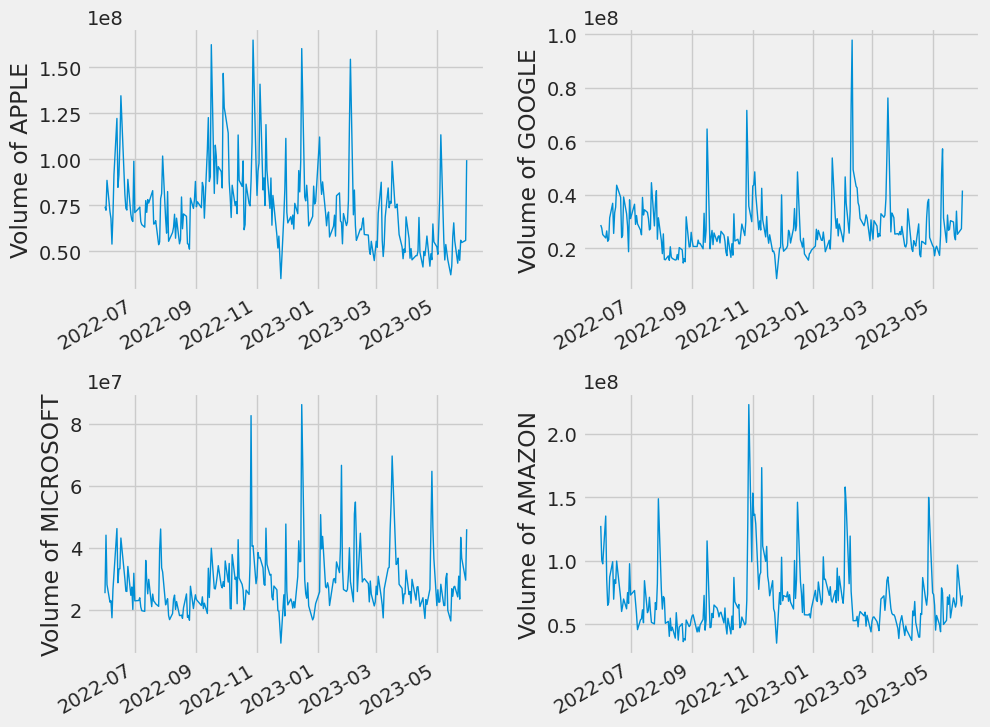

In [70]:
plt.figure(figsize=(10,7.5))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Volume'].plot(linewidth=1)
  plt.xlabel(None)
  plt.ylabel(f"Volume of {company_name[i - 1]}")

plt.tight_layout()


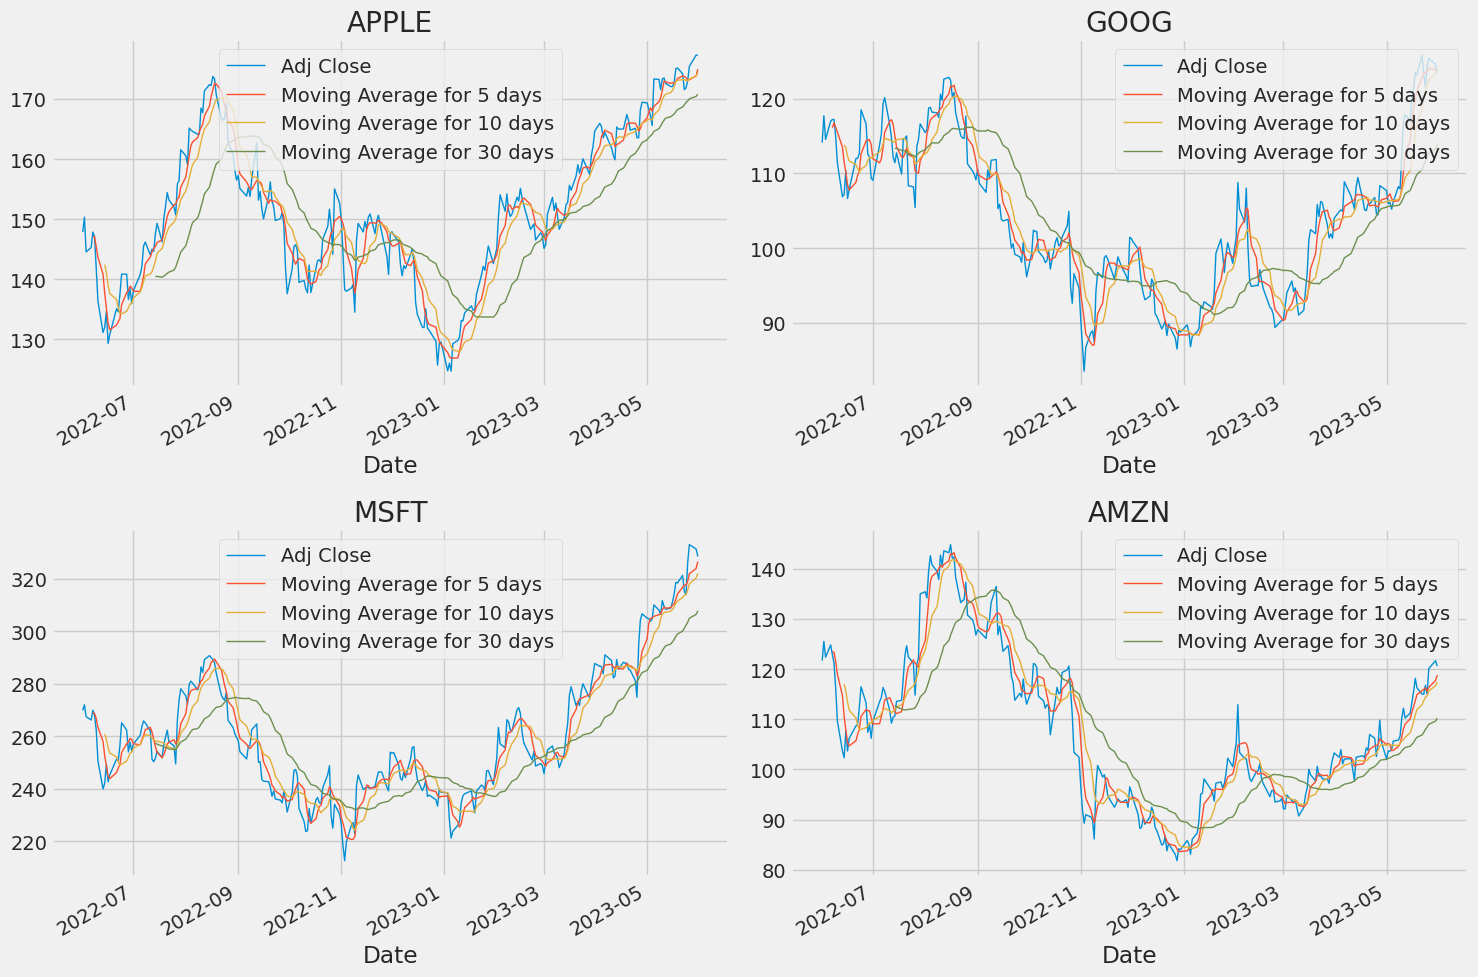

In [71]:
ma_days=[5,10,30]
for ma in ma_days:
  for company in company_list:
    column_name=f"Moving Average for {ma} days"
    company[column_name]=company['Adj Close'].rolling(ma).mean()

fig, axes= plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.legend(fontsize=2)

AAPL[['Adj Close', 'Moving Average for 5 days', 'Moving Average for 10 days', 'Moving Average for 30 days']].plot(linewidth=1, ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'Moving Average for 5 days', 'Moving Average for 10 days', 'Moving Average for 30 days']].plot(linewidth=1, ax=axes[0,1])
axes[0,1].set_title('GOOG')

MSFT[['Adj Close', 'Moving Average for 5 days', 'Moving Average for 10 days', 'Moving Average for 30 days']].plot(linewidth=1, ax=axes[1,0])
axes[1,0].set_title('MSFT')

AMZN[['Adj Close', 'Moving Average for 5 days', 'Moving Average for 10 days', 'Moving Average for 30 days']].plot(linewidth=1, ax=axes[1,1])
axes[1,1].set_title('AMZN')

plt.tight_layout()

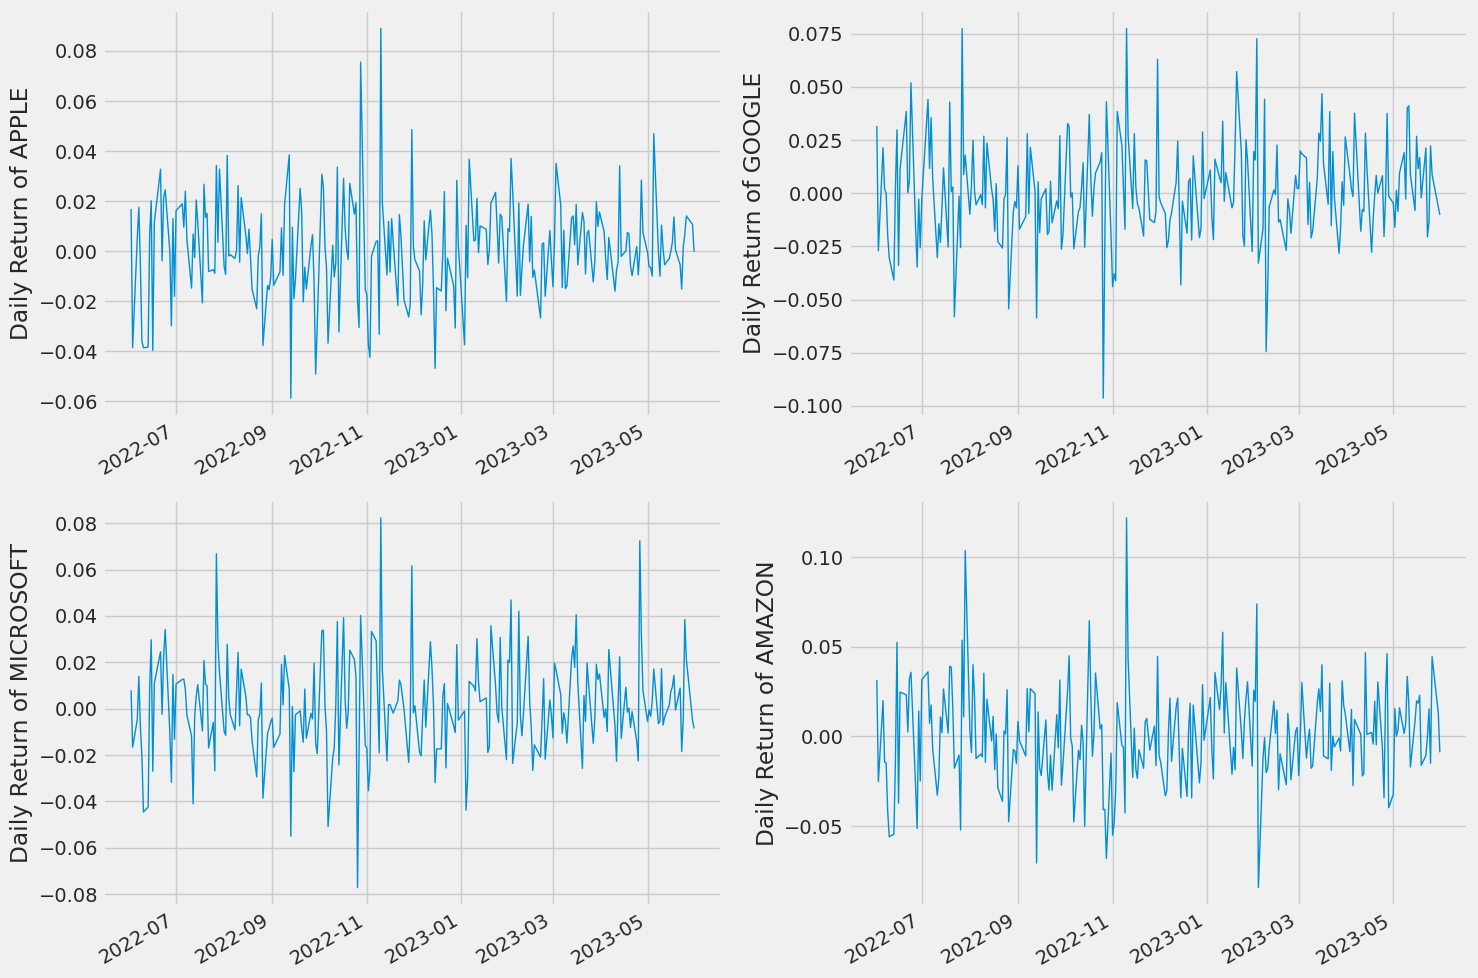

In [74]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for company in company_list:
  company['Daily Return']=company['Adj Close'].pct_change()

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Daily Return'].plot(linewidth=1)
  plt.xlabel(None)
  plt.ylabel(f"Daily Return of {company_name[i - 1]}")

plt.tight_layout()

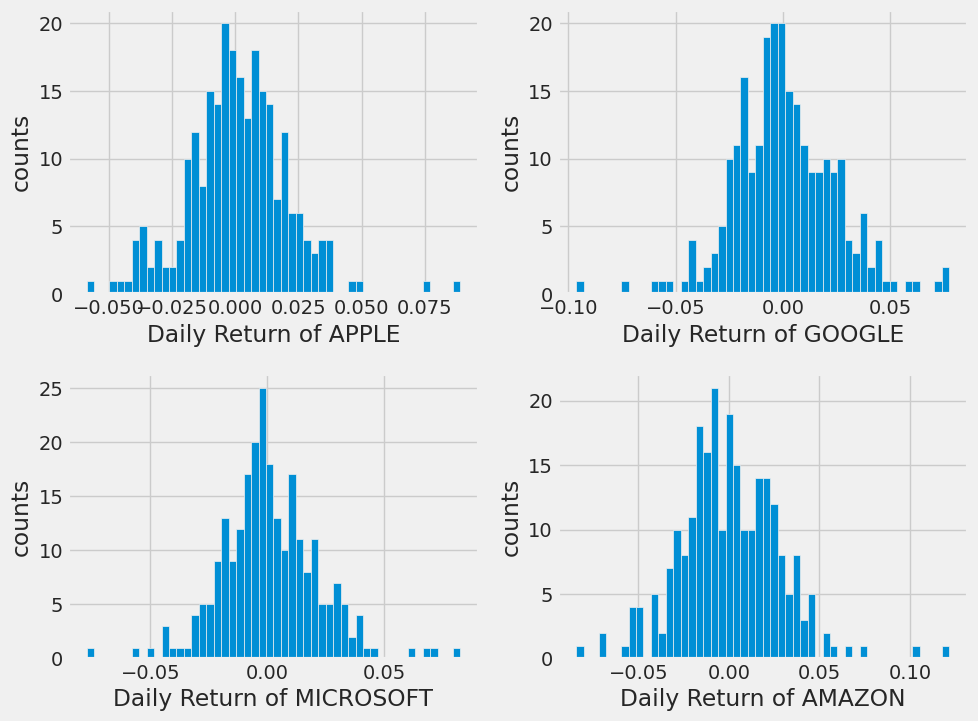

In [75]:
plt.figure(figsize=(10,7.5))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins=50)
  plt.ylabel('counts')
  plt.xlabel(f"Daily Return of {company_name[i - 1]}")

plt.tight_layout()

In [76]:
closing_df=pdr.get_data_yahoo(tech_list, start=start, end=end)["Adj Close"]
closing_df.head(5)

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-01,147.827286,121.683998,114.137001,269.811920
2022-06-02,150.312454,125.511002,117.746002,271.951263
2022-06-03,144.517059,122.349998,114.564003,267.434906
2022-06-06,145.272552,124.790001,117.010498,266.177063
2022-06-07,147.827286,123.000000,117.229500,269.891205


In [77]:
tech_rets=closing_df.pct_change()
tech_rets.head(5)

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-01,NaN,NaN,NaN,NaN
2022-06-02,0.016811,0.031450,0.031620,0.007929
2022-06-03,-0.038556,-0.025185,-0.027024,-0.016607
2022-06-06,0.005228,0.019943,0.021355,-0.004703
2022-06-07,0.017586,-0.014344,0.001872,0.013954


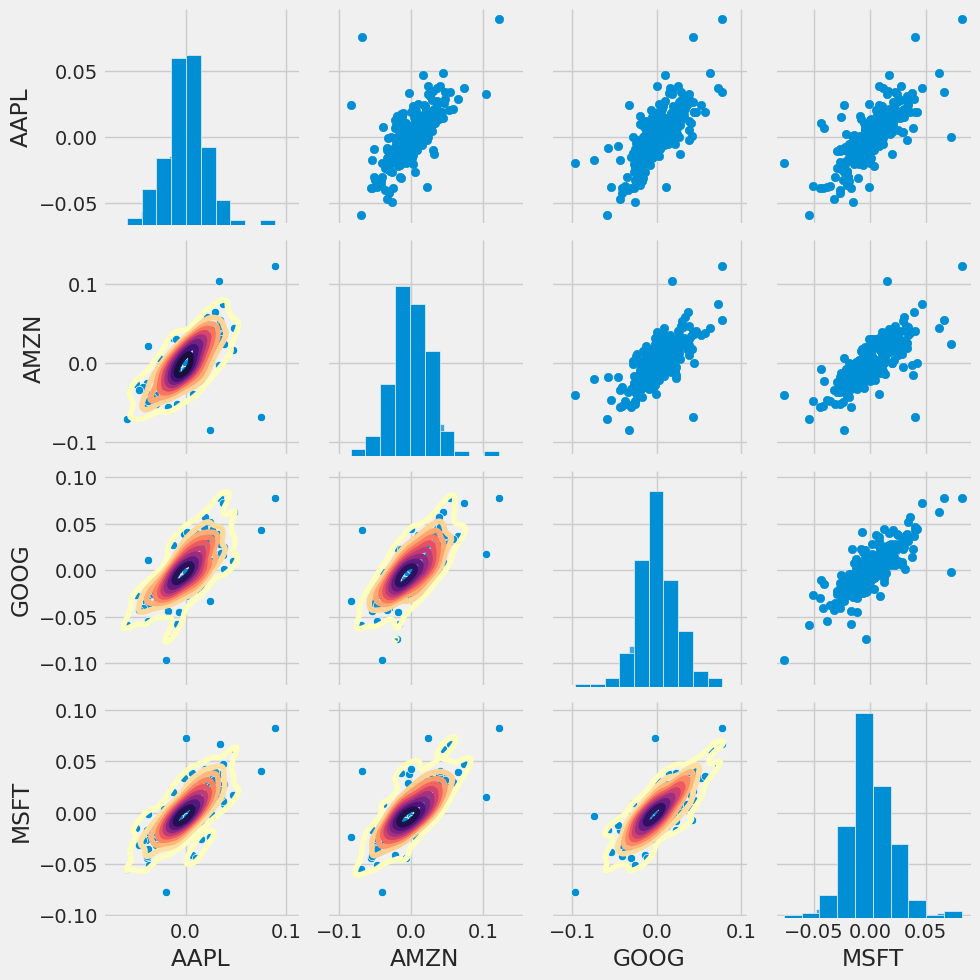

In [87]:
relation_fig=sns.pairplot(tech_rets)
relation_fig.map_upper(plt.scatter)
relation_fig.map_lower(sns.kdeplot, cmap='magma_r')
relation_fig.map_diag(plt.hist)


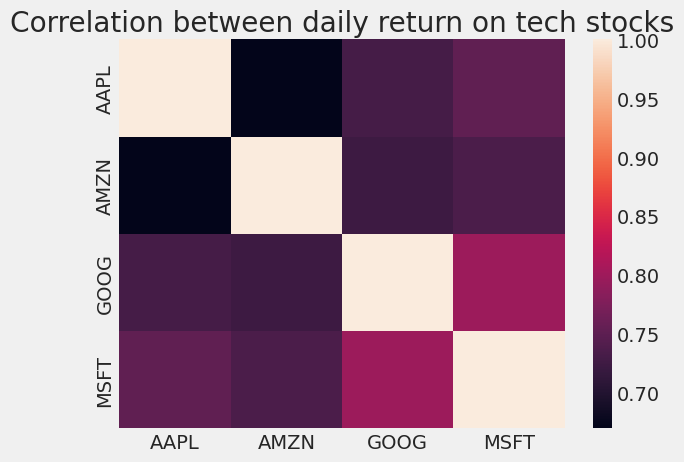

In [90]:
sns.heatmap(tech_rets.corr())
plt.title("Correlation between daily return on tech stocks")
plt.show()

In [96]:
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.366358,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.869186,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.092665,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.435865,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.140560,59706800
...,...,...,...,...,...,...
2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23384900
2023-05-25,323.239990,326.899994,320.000000,325.920013,325.920013,43301700
2023-05-26,324.019989,333.399994,323.880005,332.890015,332.890015,36600900


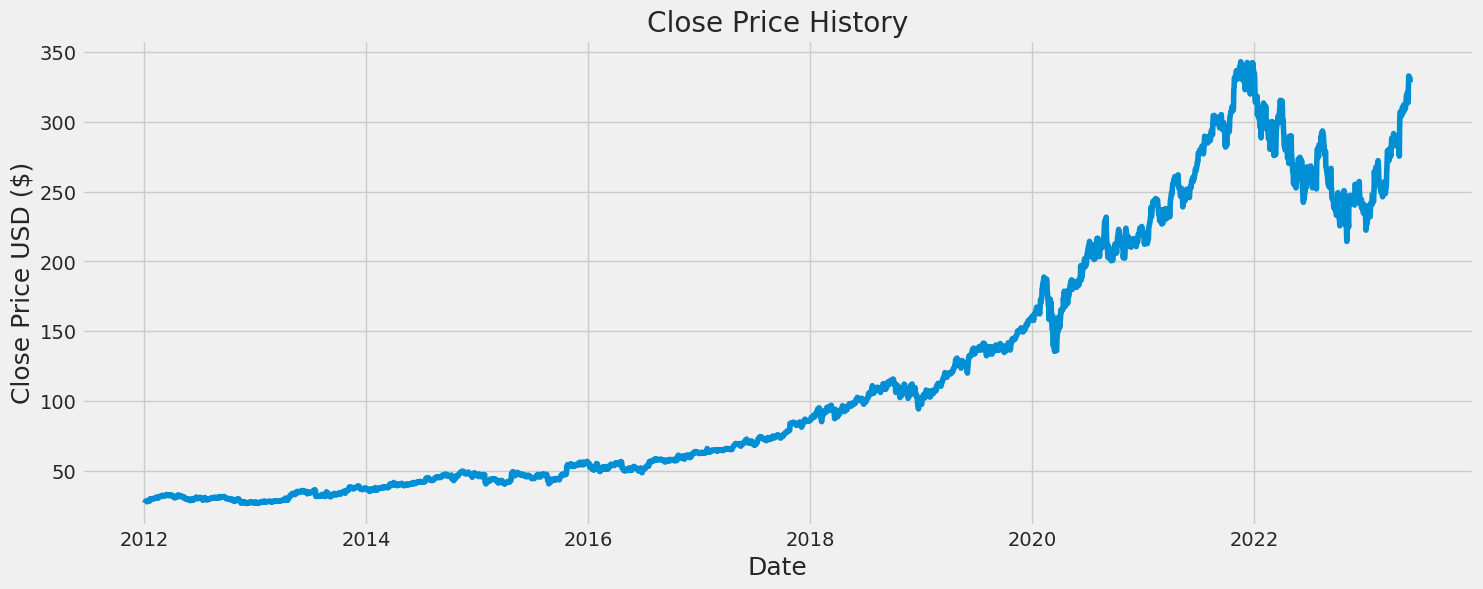

In [97]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [98]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2728

In [99]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.96773388],
       [0.96242977],
       [0.95352664]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [102]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2668/2668 [==============================] - 116s 42ms/step - loss: 0.0010


In [103]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 37ms/step


9.881562785111374

<ipython-input-104-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


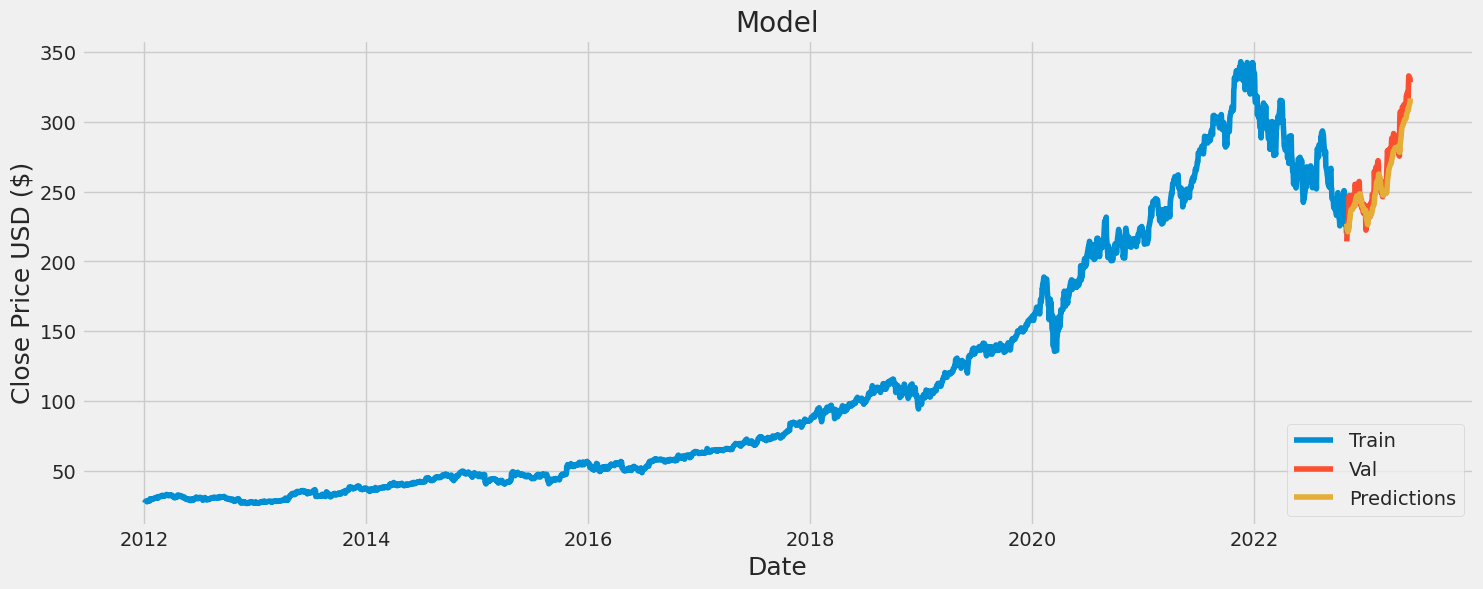

In [104]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

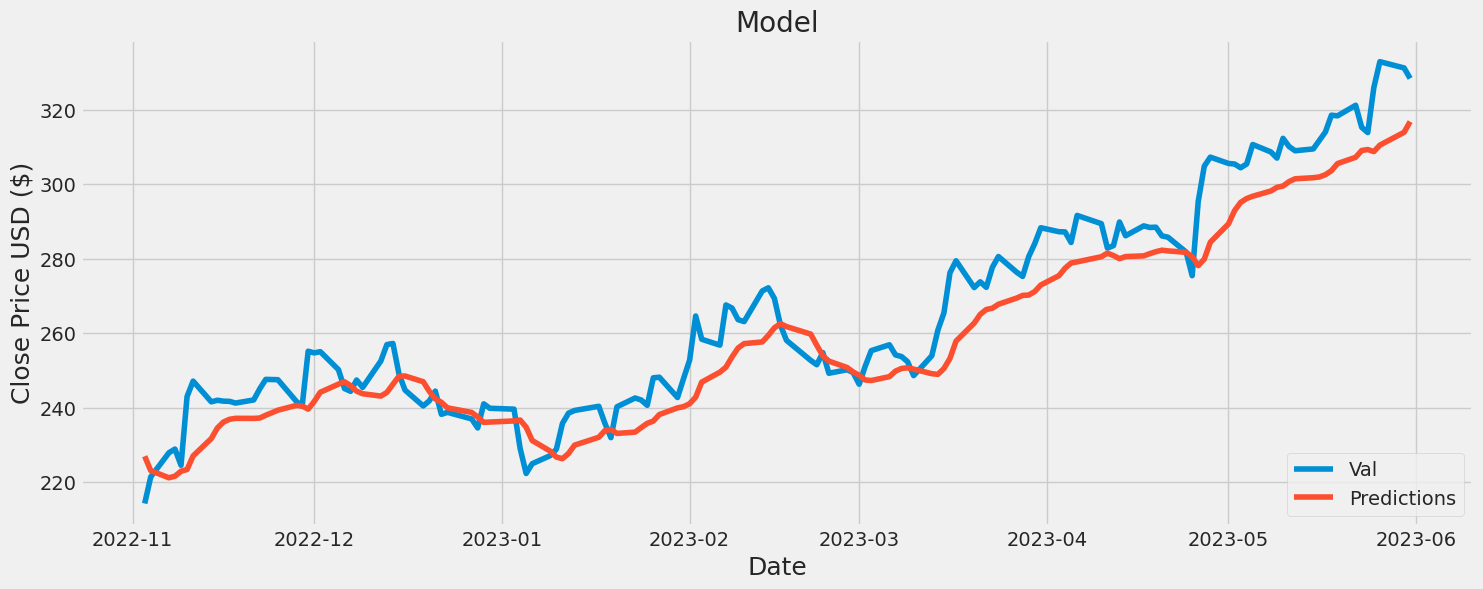

In [105]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()